In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

whitewine= pd.read_csv('winequality-white.csv',delimiter=';')


### preliminary preprocessing

In [4]:
#checking duplicated values
sum(whitewine.duplicated())


937

In [5]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


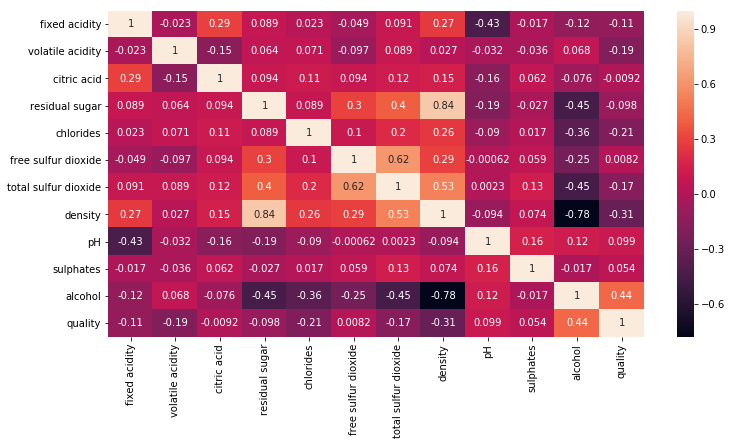

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(whitewine.corr(), annot=True)

In [7]:
## preprocessing steps

In [8]:
# whitewine =whitewine.drop_duplicates()
# whitewine.shape

In [9]:
# "chlorides","citric acid","sulphates", 

In [10]:
whitewine.drop(["chlorides","citric acid","sulphates", ],axis=1,inplace = True)

In [1]:
whitewine.head(40
              )

NameError: name 'whitewine' is not defined

In [11]:
# reindexing the dataframe
whitewine = whitewine.reset_index(drop=True)

In [12]:
quality = whitewine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low Quality")
    elif num > 7:
        category.append("High Quality")
    else:
        category.append("Normal Quality")
len(category)

4898

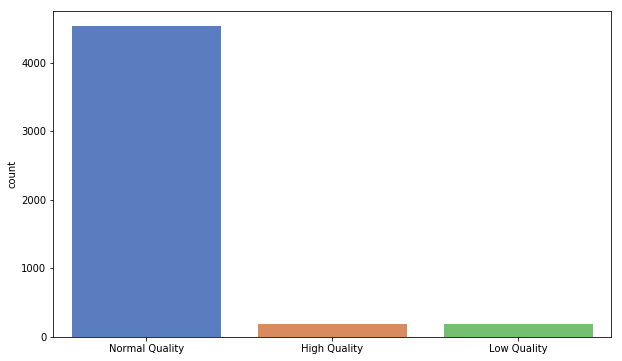

In [13]:

%matplotlib inline
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")


In [14]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([whitewine, category], axis=1)

data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

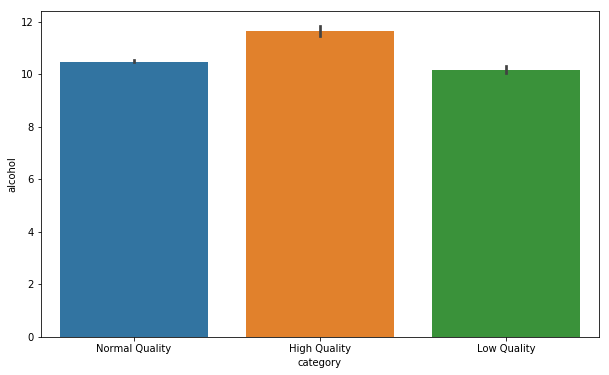

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'alcohol', data = data)

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [17]:
labelencoder_y.transform(["High Quality","Low Quality", "Normal Quality"])

array([1, 0, 2], dtype=int64)

In [18]:
data["category"].value_counts()

Normal Quality    4535
Low Quality        183
High Quality       180
Name: category, dtype: int64

In [19]:
y.astype

<function ndarray.astype>

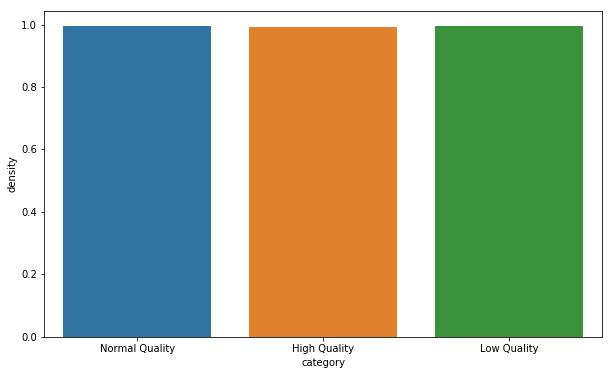

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'density', data = data)

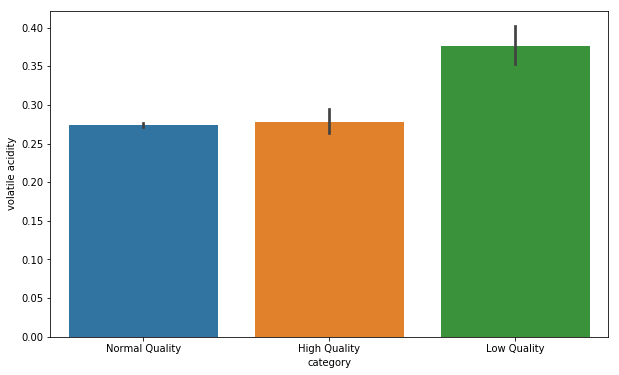

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'volatile acidity', data = data)

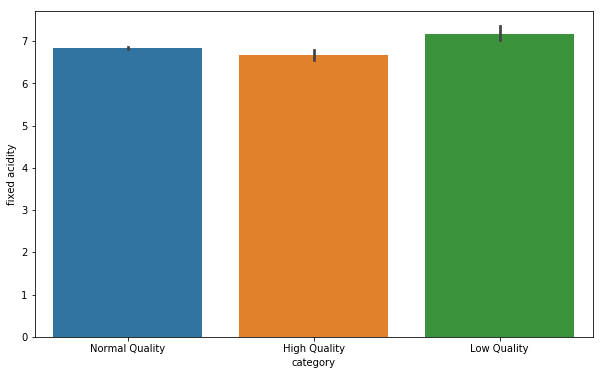

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'fixed acidity', data = data)

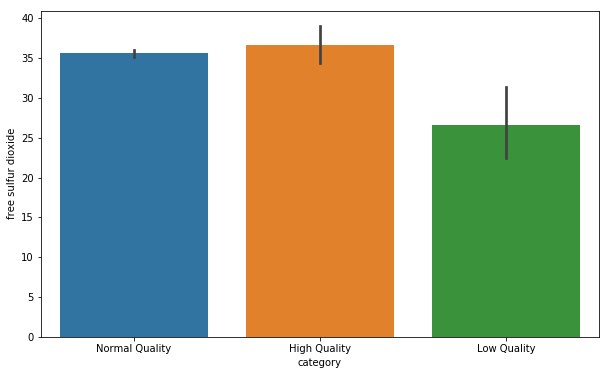

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'free sulfur dioxide', data = data)

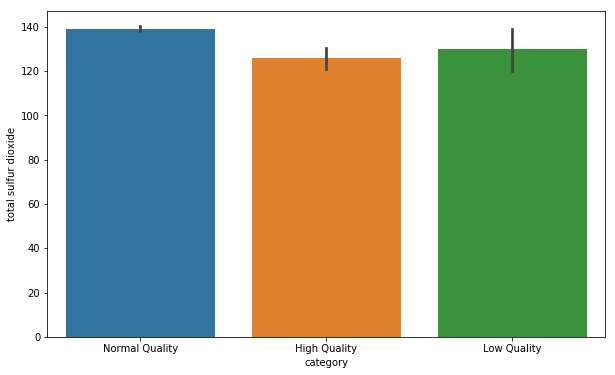

In [24]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'total sulfur dioxide', data = data)

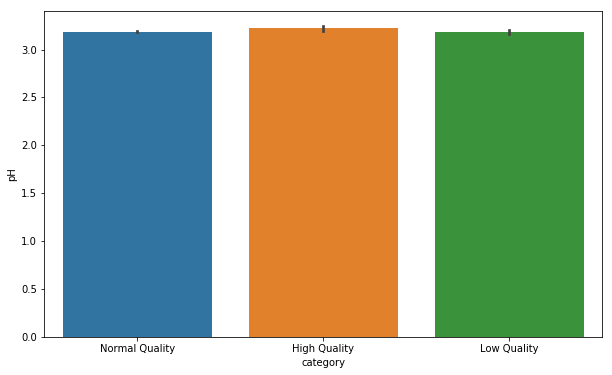

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'pH', data = data)

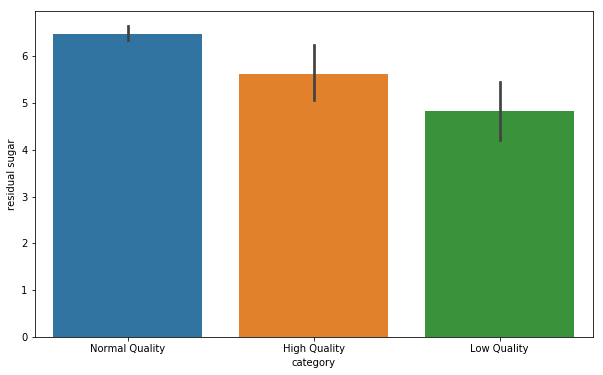

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'category', y = 'residual sugar', data = data)

In [27]:
whitewine

,fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality
0,7.0,0.270,20.70,45.0,170.0,1.00100,3.00,8.800000,6
1,6.3,0.300,1.60,14.0,132.0,0.99400,3.30,9.500000,6
2,8.1,0.280,6.90,30.0,97.0,0.99510,3.26,10.100000,6
3,7.2,0.230,8.50,47.0,186.0,0.99560,3.19,9.900000,6
4,7.2,0.230,8.50,47.0,186.0,0.99560,3.19,9.900000,6
5,8.1,0.280,6.90,30.0,97.0,0.99510,3.26,10.100000,6
6,6.2,0.320,7.00,30.0,136.0,0.99490,3.18,9.600000,6
7,7.0,0.270,20.70,45.0,170.0,1.00100,3.00,8.800000,6
8,6.3,0.300,1.60,14.0,132.0,0.99400,3.30,9.500000,6
9,8.1,0.220,1.50,28.0,129.0,0.99380,3.22,11.000000,6


In [28]:
len(y)

4898

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
z1 = pd.DataFrame(X_test.copy())
z2 = pd.DataFrame(y_test.copy())
dataframeForTest = pd.concat([z1,z2], axis=1)

In [31]:
# from sklearn.preprocessing import StandardScaler
# # # Applying Standard scaling to get optimized result
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
# #model
# from sklearn.svm import SVC
# svm = SVC( C='1',gamma='0.09',kernel='rbf')
clf_sw = RandomForestClassifier(random_state=2018, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf_sw, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=True, random_state=2018, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
rfc_gs.best_params_

{'min_samples_leaf': 1, 'n_estimators': 200}

In [35]:
rfc_gs.best_score_

0.9423175089331292

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
pred_rfc = rfc_gs.predict(X_test)
print(classification_report(y_test, pred_rfc))

print("traning accuracy", rfc_gs.score(X_train,y_train))
print("testing accuracy", rfc_gs.score(X_test,y_test))


              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.80      0.27      0.40        30
           2       0.95      1.00      0.98       915

   micro avg       0.95      0.95      0.95       980
   macro avg       0.90      0.55      0.65       980
weighted avg       0.95      0.95      0.94       980

traning accuracy 1.0
testing accuracy 0.9530612244897959


              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.80      0.27      0.40        30
           2       0.95      1.00      0.98       915

   micro avg       0.95      0.95      0.95       980
   macro avg       0.90      0.55      0.65       980
weighted avg       0.95      0.95      0.94       980

[[ 14   0  21]
 [  0   8  22]
 [  1   2 912]]


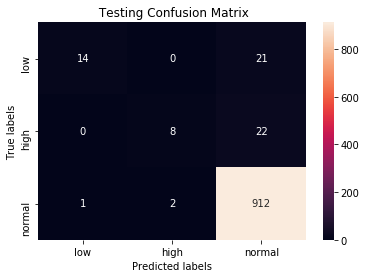

In [38]:

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))
cm =confusion_matrix(y_test,pred_rfc)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(['low', 'high','normal']); ax.yaxis.set_ticklabels(['low', 'high','normal']);



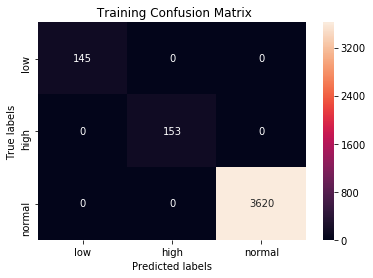

In [39]:
cm2 =confusion_matrix(y_train, rfc_gs.predict(X_train))
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(['low', 'high','normal']); ax.yaxis.set_ticklabels(['low', 'high','normal']);


In [40]:
#Resampling
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
# under sample "2" ；
# over sample "1", "0"
smt = ClusterCentroids(ratio={2:1500})
X_sm, y_sm = smt.fit_sample(X_train, y_train)
smt2 = SMOTE(ratio={0: 1500, 1: 1500})
X_sm2, y_sm2 = smt2.fit_sample(X_sm, y_sm)



In [41]:
X_sm.shape
y_sm.shape

(1798,)

In [42]:
np.unique(y_sm2, return_counts=True)

(array([0, 1, 2]), array([1500, 1500, 1500], dtype=int64))

In [43]:
clf_sw= RandomForestClassifier(random_state=2018, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250,300],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs_rsw = GridSearchCV(clf_sw, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs_rsw.fit(X_sm2, y_sm2)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=True, random_state=2018, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
rfc_gs_rsw.best_score_

0.9066666666666666

In [45]:

rfc_gs_rsw.best_params_


{'min_samples_leaf': 1, 'n_estimators': 200}

In [46]:
pred_rfc_gsw = rfc_gs_rsw.predict(X_test)
print(classification_report(y_test, pred_rfc_gsw))

print("traning accuracy", rfc_gs_rsw.score(X_train,y_train))
print("testing accuracy", rfc_gs_rsw.score(X_test,y_test))

    

              precision    recall  f1-score   support

           0       0.19      0.74      0.30        35
           1       0.20      0.53      0.29        30
           2       0.97      0.81      0.88       915

   micro avg       0.79      0.79      0.79       980
   macro avg       0.45      0.69      0.49       980
weighted avg       0.92      0.79      0.84       980

traning accuracy 0.8726391015824401
testing accuracy 0.7948979591836735


              precision    recall  f1-score   support

           0       0.19      0.74      0.30        35
           1       0.20      0.53      0.29        30
           2       0.97      0.81      0.88       915

   micro avg       0.79      0.79      0.79       980
   macro avg       0.45      0.69      0.49       980
weighted avg       0.92      0.79      0.84       980

[[ 26   0   9]
 [  0  16  14]
 [114  64 737]]


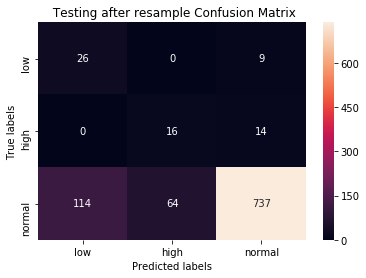

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc_gsw))
cm =confusion_matrix(y_test,pred_rfc_gsw)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Testing after resample Confusion Matrix'); 
ax.xaxis.set_ticklabels(['low', 'high','normal']); ax.yaxis.set_ticklabels(['low', 'high','normal']);



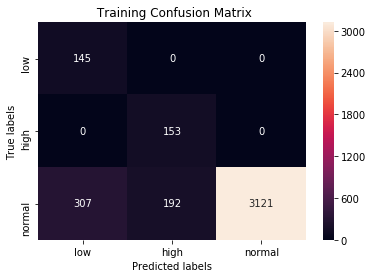

In [48]:
cm2 =confusion_matrix(y_train, rfc_gs_rsw.predict(X_train))
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(['low', 'high','normal']); ax.yaxis.set_ticklabels(['low', 'high','normal']);


In [54]:
clf_sw = RandomForestClassifier(min_samples_leaf=1, n_estimators=150)
clf_sw.fit(X_sm2, y_sm2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:

predicted = pd.DataFrame(clf_sw.predict(X_test))
pd.options.display.max_rows = None
pd.concat([dataframeForTest,predicted], axis=1)

,0,1,2,3,4,5,6,7,0,0
0,6.0,0.290,10.80,55.0,149.0,0.99370,3.09,10.966667,2,2
1,5.4,0.530,2.70,34.0,128.0,0.98856,3.20,13.200000,0,0
2,7.1,0.250,2.10,30.0,124.0,0.99080,3.28,12.200000,0,0
3,7.3,0.280,1.60,31.0,148.0,0.99178,3.18,10.700000,2,2
4,6.5,0.320,5.70,27.0,91.0,0.99184,3.28,12.000000,2,2
5,6.3,0.300,8.20,50.0,199.0,0.99394,3.39,11.700000,2,2
6,7.0,0.360,11.60,35.0,228.0,0.99770,3.13,8.900000,2,2
7,7.6,0.260,1.60,6.0,106.0,0.99300,3.15,10.400000,1,1
8,8.3,0.180,1.10,20.0,57.0,0.99109,3.02,11.000000,2,2
9,8.7,0.310,14.35,27.0,191.0,1.00013,2.96,8.700000,2,2


In [60]:
from sklearn.externals import joblib
joblib.dump(clf_sw, "modelwhite.joblib", compress=9)
# joblib.dump(sc, "scalerwhite.joblib", compress=9)


['modelwhite.joblib']

In [57]:
pred_rfc_gw = clf_sw.predict(X_test)

              precision    recall  f1-score   support

           0       0.19      0.74      0.30        35
           1       0.20      0.53      0.29        30
           2       0.97      0.81      0.88       915

   micro avg       0.80      0.80      0.80       980
   macro avg       0.45      0.69      0.49       980
weighted avg       0.92      0.80      0.84       980

[[ 26   0   9]
 [  0  16  14]
 [110  65 740]]


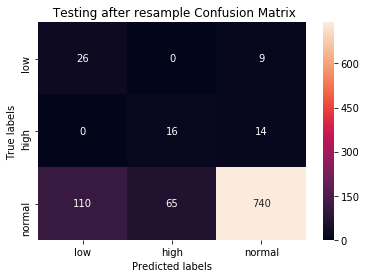

In [58]:
print(classification_report(y_test, pred_rfc_gw))
cm =confusion_matrix(y_test,pred_rfc_gw)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Testing after resample Confusion Matrix'); 
ax.xaxis.set_ticklabels(['low', 'high','normal']); ax.yaxis.set_ticklabels(['low', 'high','normal']);

